## Census Data - Data Cleaning

#### The purpose of this analysis is to accurately classify whether an individual identified has an income of '<=50k' or '>50k'. In this exercise, we will perform multiple activities including data cleaning, splitting the data into training and testing and comparison of the models created.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
adult_census = pd.read_csv('adult-modified.csv', header = 0)
adult_census.head()

,age,workclass,education,marital-status,race,sex,hours-per-week,income
0,39,Public,13,Single,White,Male,40,<=50K
1,50,Self-emp,13,Married,White,Male,13,<=50K
2,38,Private,9,Single,White,Male,40,<=50K
3,53,Private,7,Married,Black,Male,40,<=50K
4,28,Private,13,Married,Black,Female,40,<=50K


In [3]:
#Categorical Variables
cat = ['workclass', 'marital-status', 'race', 'sex', 'income']

for i in cat:
    print (adult_census[i].value_counts(), "\n")

Private     6947
Public      1317
Self-emp    1148
?            588
Name: workclass, dtype: int64 

Single     5017
Married    4983
Name: marital-status, dtype: int64 

White          8556
Black           953
Asian           309
Amer-Indian      99
Hispanic         83
Name: race, dtype: int64 

Male      6703
Female    3297
Name: sex, dtype: int64 

<=50K    7621
>50K     2379
Name: income, dtype: int64 



In [4]:
adult_census = adult_census.replace('?', np.NaN)

In [5]:
num = ['age','education','hour-per-week']

adult_census.describe(include = "all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,9802,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,71,3,NaN,2,5,2,NaN,2
top,31,Private,NaN,Single,White,Male,NaN,<=50K
freq,284,6947,NaN,5017,8556,6703,NaN,7621
mean,NaN,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,NaN,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,NaN,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,NaN,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,NaN,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


In [6]:
adult_census['age'].isnull().sum()

198

In [7]:
adult_census['age'] = adult_census['age'].astype('float')

adult_census['age'] = adult_census['age'].fillna(adult_census['age'].mean())

In [8]:
adult_census.describe(include = "all")

,age,workclass,education,marital-status,race,sex,hours-per-week,income
count,10000.000000,9412,10000.000000,10000,10000,10000,10000.000000,10000
unique,NaN,3,NaN,2,5,2,NaN,2
top,NaN,Private,NaN,Single,White,Male,NaN,<=50K
freq,NaN,6947,NaN,5017,8556,6703,NaN,7621
mean,38.449806,NaN,10.076600,NaN,NaN,NaN,40.530300,NaN
std,13.476503,NaN,2.548172,NaN,NaN,NaN,12.277197,NaN
min,17.000000,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN
25%,28.000000,NaN,9.000000,NaN,NaN,NaN,40.000000,NaN
50%,37.000000,NaN,10.000000,NaN,NaN,NaN,40.000000,NaN
75%,47.000000,NaN,12.000000,NaN,NaN,NaN,45.000000,NaN


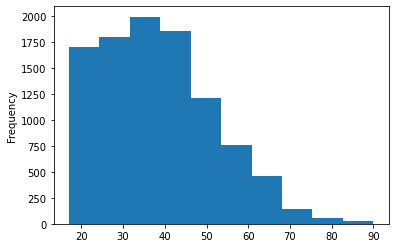

In [9]:
adult_census['age'].plot(kind = 'hist')

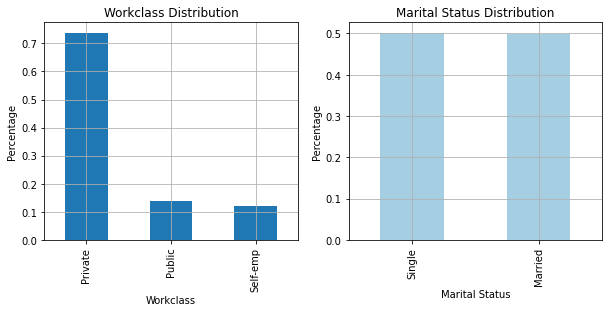

In [10]:
age_per = adult_census['workclass'].value_counts()/adult_census['workclass'].count()
ms_per = adult_census['marital-status'].value_counts()/adult_census['marital-status'].count()

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Workclass')
ax1.set_ylabel('Percentage')
ax1.set_title("Workclass Distribution")
age_per.plot(kind='bar', grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Marital Status')
ax1.set_ylabel('Percentage')
ax1.set_title("Marital Status Distribution")
ms_per.plot(kind='bar', grid = True, colormap = 'Paired')

#### The above bar graphs show the distributions for Workclass and Marital Status. The marital status in the dataset is split 50-50. Most of the workclass distribution shows individuals are working for Private Corporations. The below are cross-tabulations (including generating bar charts): education+race, work-class+income, work-class+race, and race+income.

In [11]:
gg1 = pd.crosstab(adult_census['education'], adult_census['race'])
gg1

race,Amer-Indian,Asian,Black,Hispanic,White
education,,,,,
1,0,0,1,0,15
2,0,1,4,3,41
3,0,4,6,3,75
4,5,5,17,6,172
5,0,3,23,2,125
6,9,4,31,4,247
7,4,7,52,5,295
8,0,3,19,3,84
9,35,71,377,25,2724


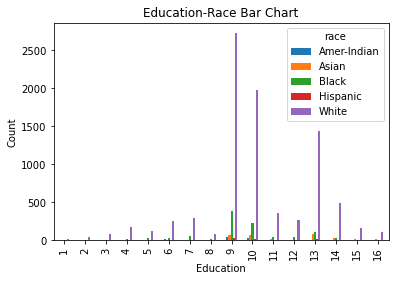

In [12]:
gg1.plot(kind="bar")
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education-Race Bar Chart')
plt.show()

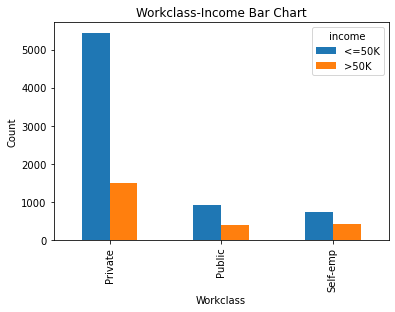

In [13]:
gg2 = pd.crosstab(adult_census['workclass'], adult_census['income'])
gg2.plot(kind="bar")
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass-Income Bar Chart')
plt.show()

#### The Workclass-Income shows the distribution between >50K and <50K jobs. The greatest variance between the two is in the private sector. The proportion of jobs in the private working class earned more that 50 is higher than self-employed or public employment.

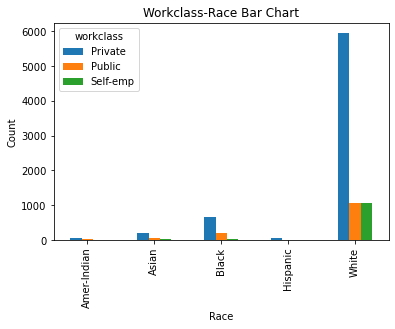

In [14]:
gg3 = pd.crosstab(adult_census['race'], adult_census['workclass'])
gg3.plot(kind="bar")
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Workclass-Race Bar Chart')
plt.show()

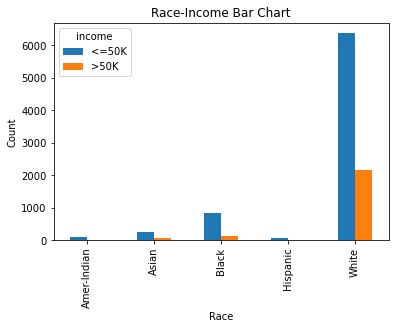

In [15]:
gg4 = pd.crosstab(adult_census['race'], adult_census['income'])
gg4.plot(kind="bar")
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Race-Income Bar Chart')
plt.show()

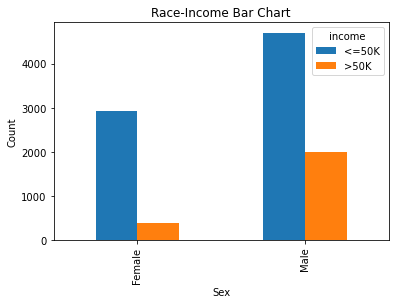

In [16]:
gg5 = pd.crosstab(adult_census['sex'], adult_census['income'])
gg5.plot(kind="bar")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Race-Income Bar Chart')
plt.show()

#### Males generally had a higher proportion of individuals earning more than 50k. Comparatively, woman had a greater proportion of individuals earning less than 50k.

## Predictive Models to classify the income of individuals

In [17]:
ac = adult_census
ac = ac.reindex(np.random.permutation(ac.index))

In [18]:
ac_target = ac['income']
ac = ac.drop(['income'], axis = 1)
ac

,age,workclass,education,marital-status,race,sex,hours-per-week
4624,29.0,Private,9,Single,White,Female,40
5544,33.0,Public,12,Single,White,Male,56
8113,31.0,Private,9,Married,White,Male,45
13,32.0,Private,12,Single,Black,Male,50
4422,56.0,NaN,10,Married,Black,Female,40
...,...,...,...,...,...,...,...
213,60.0,Private,9,Married,Asian,Male,40
4768,40.0,Public,14,Married,Asian,Male,40
8228,48.0,Public,9,Married,White,Male,40
2343,21.0,Private,7,Single,Black,Female,40


In [19]:
ac = pd.get_dummies(ac)
ac

,age,education,hours-per-week,workclass_Private,workclass_Public,workclass_Self-emp,marital-status_Married,marital-status_Single,race_Amer-Indian,race_Asian,race_Black,race_Hispanic,race_White,sex_Female,sex_Male
4624,29.0,9,40,1,0,0,0,1,0,0,0,0,1,1,0
5544,33.0,12,56,0,1,0,0,1,0,0,0,0,1,0,1
8113,31.0,9,45,1,0,0,1,0,0,0,0,0,1,0,1
13,32.0,12,50,1,0,0,0,1,0,0,1,0,0,0,1
4422,56.0,10,40,0,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213,60.0,9,40,1,0,0,1,0,0,1,0,0,0,0,1
4768,40.0,14,40,0,1,0,1,0,0,1,0,0,0,0,1
8228,48.0,9,40,0,1,0,1,0,0,0,0,0,1,0,1
2343,21.0,7,40,1,0,0,0,1,0,0,1,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
ac_train, ac_test, ac_target_train, ac_target_test = train_test_split(ac, ac_target, test_size = 0.2, random_state = 240)

### Naive Bayes classifier

In [23]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(ac_train, ac_target_train)

GaussianNB()

In [24]:
incpreds = clf.predict(ac_test)
incpreds

array(['>50K', '>50K', '>50K', ..., '<=50K', '>50K', '<=50K'], dtype='<U5')

In [25]:
ac_target_test = np.array(ac_target_test)
accuracy = np.count_nonzero(incpreds == ac_target_test)/len(ac_target_test)
accuracy * 100

71.65

#### The Naive Bayes calculation is a probability based approach where the probability of an event conditionally independent given the occurence of different event. Based on the calculations,the accuracy on this census test data shows a 71.2% accuracy. 

### Decision Tree

In [26]:
from sklearn import tree
treeclf3 = tree.DecisionTreeClassifier(criterion = 'gini', min_samples_split = 10)
treeclf3.fit(ac_train, ac_target_train)

DecisionTreeClassifier(min_samples_split=10)

In [27]:
treepreds3_test = treeclf3.predict(ac_test)
treepreds3_test

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '<=50K'],
      dtype=object)

In [28]:
accuracy = np.count_nonzero(treepreds3_test == ac_target_test)/len(ac_target_test)
accuracy * 100

77.4

### Linear Discriminant Analysis

#### Based on the decision tree breakdown using the GINI index, which is a measure of the most amount of information gained with each branch. Based on the classification, the model was able to prodict with 77% precision the actual label.

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

ldaclf = LinearDiscriminantAnalysis()
ldaclf.fit(ac_train, ac_target_train)

LinearDiscriminantAnalysis()

In [30]:
predval = ldaclf.predict(ac_test)

In [31]:
accuracy = np.count_nonzero(predval == ac_target_test)/len(ac_target_test)
accuracy * 100

80.2

#### The goal of Linear Discriminant Analysis is to reduce dimensionality of the data and use the information underlying to create divisions and separations to classify the information. New dimensions are created from which each of the test points is evaluated for distance from the centroid. Based on the distance, the appropriate class is assigned to the sample. The analysis here shows that LDA outperformed both the Naive Bayes and Decision Trees with 80% precision.